# Calculating Star Formation Rate Density

In another notebook, we calculated the Schechter function using various parameters from various literature values. We also computed the luminosity density by integrating the Schechter function. We can use a conversion factor to convert this luminosity density into the star formation rate density, such a conversion factor is usually denoted by $\kappa$. There may be different values of $\kappa$ depending upon the wavelength band of the spectrum used (i.e., IR or UV). In the present notebook, we shall use the values of this conversion factor from Madau & Dickinson (2014). Their values are,

$$\kappa_{FUV} = 2.2 \times 10^{-10} M_\odot year^{-1} L_\odot^{-1}$$ and $$\kappa_{IR} = 4.5 \times 10^{-44} M_\odot year^{-1} erg^{-1} s$$

Here, we note that the value of $\kappa_{FUV}$ is at $1500$ angstrom and it is in the units of solar luminosity, so we want to divide this value to the solar luminosity to find $\kappa_{FUV}$ in cgs units.

We first aim to use values for the Schechter function from Bouwens et al. (2012) to compute the luminosity density at various redshifts. Later, we use $\kappa_{FUV}$ (since Bouwens et al. 2012 used UV range) to measure the Star formation rate density. Finally, we shall plot the results.

After testing the code for values from Bouwens et al. (2012), we repeat the procedure for various other works for different spectral range and different redshifts with different Schechter parameters.

Let's start with the Bouwens et al. (2012) parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import os
import utils as utl
import scipy.integrate as inte

## Calculation of SFRD for Bouwens et al. (2012)

Below we read all of the required parameters from the paper, and list them.

In [2]:
# Redshift
z_bou = np.array([4,5,6,7,8])

# Characteristic absolute magnitude
mst_bou = np.array([-20.98, -20.60, -20.37, -20.14, -20.10])
msterr_bou = np.array([0.10, 0.23, 0.30, 0.26, 0.52])

# Characteristic luminosity
lst_bou = np.array([])
lsterr_bou = np.array([])

for i in range(len(mst_bou)):
    mst1 = np.random.normal(mst_bou[i], msterr_bou[i], 10000)
    lst1 = utl.m_to_l_wave(mst1, 1500)
    lst_bou = np.hstack((lst_bou, np.mean(lst1)))
    lsterr_bou = np.hstack((lsterr_bou, np.std(lst1)))


# Normalisation constant
phi_bou = np.array([1.3, 1.4, 1.4, 0.86, 0.59])*0.001
phierr_bou = np.array([0.2, 0.6, 0.85, 0.545, 0.69])*0.001

# Alpha
alp_bou = np.array([-1.73, -1.79, -1.73, -2.01, -1.91])
alperr_bou = np.array([0.005, 0.12, 0.20, 0.21, 0.32])

# Kappas
sol_lum = (con.L_sun*1e7).value
kap_uv = 2.2e-10/sol_lum
kap_ir = 4.5*10**(-44)

# Range of Luminosities (or absolute magnitudes) used
mags_bou = np.linspace(-24, -13, 10)
lums_bou = utl.m_to_l_wave(mags_bou, 1500)

#print(np.log10(lst_bou))
#print(np.log10(lsterr_bou))
print(np.log10(lums_bou))

[45.53864671 45.04975782 44.56086893 44.07198004 43.58309115 43.09420226
 42.60531338 42.11642449 41.6275356  41.13864671]


Below we present our calculation for SFRD for various redshifts ranging from $4$ to $8$ with different parameters for the Schechter function as presented in Bouwens et al. (2012). Initially, we won't consider the error propogation; later, if this goes perfect, then we'd add the error propogation.

Schechter:
[-56.28320167 -50.72314323 -48.34794622 -47.00599027 -45.99924108
 -45.10124053 -44.23852051 -43.38724628 -42.53968533 -41.69332905]
Lum den: 
41.72873214814125
Schechter:
[-59.16113725 -51.7310211  -48.72931816 -47.16429258 -46.06535762
 -45.11763299 -44.21896442 -43.33621073 -42.45862019 -41.5827047 ]
Lum den: 
41.656110137158464
Schechter:
[-61.26941501 -52.43208303 -48.99366439 -47.30677531 -46.188122
 -45.25381724 -44.3793193  -43.52422406 -42.67542348 -41.82866504]
Lum den: 
41.531703524367835
Schechter:
[-64.9197024  -53.95964863 -49.74009202 -47.70730507 -46.38395565
 -45.29076379 -44.27224025 -43.27794081 -42.2915002  -41.30760919]
Lum den: 
41.42056228298743
Schechter:
[-64.33525806 -53.81533739 -49.77159814 -47.82887855 -46.56777724
 -45.5278083  -44.55957971 -43.61462531 -42.67722159 -41.74226747]
Lum den: 
41.198814780488526


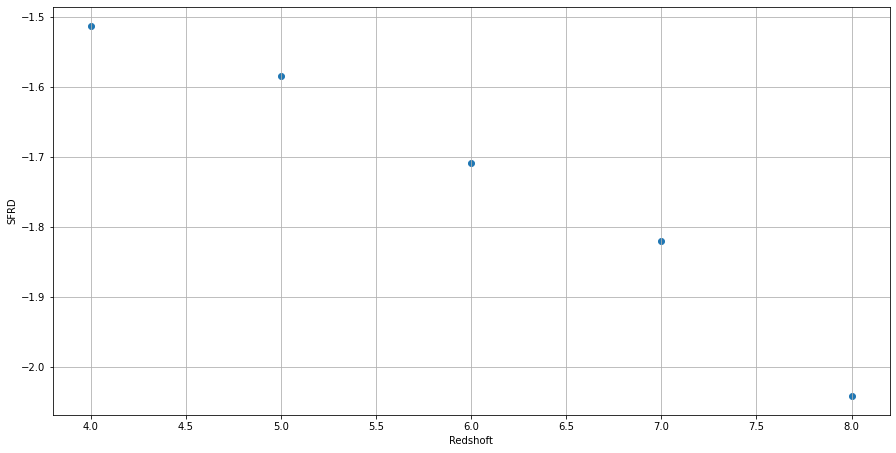

In [4]:
# Calculations without error propogation
sfrd_bou_wo = np.array([])

for i in range(len(z_bou)):
    print('Schechter:')
    print(np.log10(utl.schechter(lum=lums_bou, phi1=phi_bou[i], lum1=lst_bou[i], alpha=alp_bou[i])))
    print('Lum den: ')
    print(np.log10(utl.lum_den(lum=lums_bou, lum1=lst_bou[i], phi1=phi_bou[i], alpha=alp_bou[i])))
    sfr_wo = utl.sfrd(lum=lums_bou, lum1=lst_bou[i], phi1=phi_bou[i], alpha=alp_bou[i], kappa=kap_uv)
    sfrd_bou_wo = np.hstack((sfrd_bou_wo, sfr_wo))

log_sfr_bou_wo = np.log10(sfrd_bou_wo)#*utl.lam_to_nu(1500))

plt.figure(figsize=(15,7.5))
plt.scatter(z_bou, log_sfr_bou_wo)
plt.xlabel('Redshoft')
plt.ylabel('SFRD')
plt.grid()

It seems that the magnitude of SFRD matches with their corresponding values from Madau \& Dickinson (2014) paper. We now describe the way we propogate the errors in our calculation.

## Calculation of SFRD

Now we want to reproduce the same procedure we did above for other Schechter function parameters from literature. We make a dataset of the Schechter function parameters from the literature and saved it elsewhere. Below, we use these values from literature and compute SFRD as demonstrated above. We, for now, do not pay attention on the propogation of errors, which we include later.

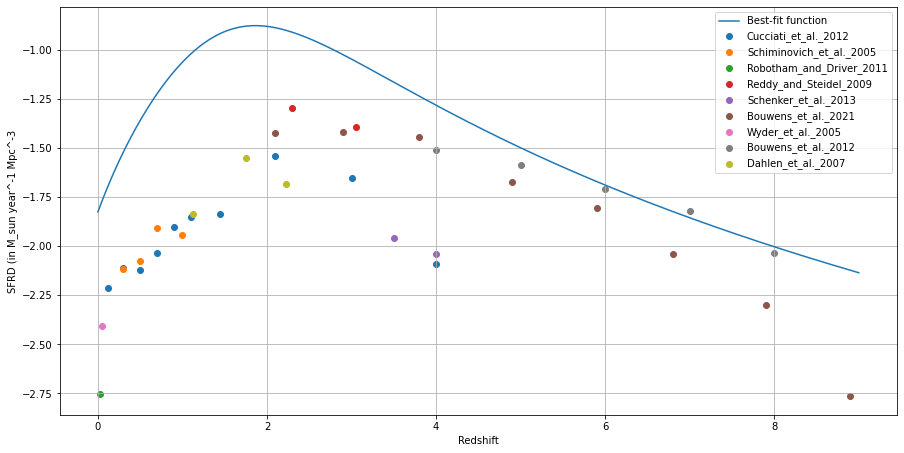

In [20]:
p1 = os.getcwd() + '/data/'
ls1 = os.listdir(p1)

list_uv = []
for i in range(len(ls1)):
    if ls1[i][0:7] == 'data_UV':
        list_uv.append(ls1[i])

z_all_uv = np.array([])
sfrd_all_uv = np.array([])
A_fuv = np.array([])

plt.figure(figsize=(15,7.5))

for i in range(len(list_uv)):
    z1_uv, z2_uv, mst_uv, msterr_uv, phi_uv, phierr_uv, alp_uv, alperr_uv, auv = np.loadtxt(p1 + list_uv[i], usecols=(0,1,2,3,4,5,6,7,9), unpack=True)
    ppr_n = np.loadtxt(p1 + list_uv[i], usecols=8, dtype=str, unpack=True)
    # Converting Magnitudes into luminosities
    lst_uv = np.array([])
    lsterr_uv = np.array([])
    if type(mst_uv) == np.float64:
        lngth = 1
        z1_uv, z2_uv, mst_uv, msterr_uv, phi_uv, phierr_uv, alp_uv, alperr_uv, ppr_n = np.array([z1_uv]), np.array([z2_uv]), np.array([mst_uv]), np.array([msterr_uv]), np.array([phi_uv]), np.array([phierr_uv]), np.array([alp_uv]), np.array([alperr_uv]), np.array([ppr_n])
    else:
        lngth = len(mst_uv)
    for k in range(lngth):
        mst1 = np.random.normal(mst_uv[k], msterr_uv[k], 10000)
        lst1 = utl.m_to_l_wave(mst1, 1500)
        lst_uv = np.hstack((lst_uv, np.mean(lst1)))
        lsterr_uv = np.hstack((lsterr_uv, np.std(lst1)))
    # Calculating SFRD
    sfrd_uv_wo = np.array([])
    for j in range(len(z1_uv)):
        sfr2_wo = utl.sfrd(lum=lums_bou, lum1=lst_uv[j], phi1=phi_uv[j], alpha=alp_uv[j], kappa=kap_uv)
        sfrd_uv_wo = np.hstack((sfrd_uv_wo, sfr2_wo))
    log_sfr_uv_wo = np.log10(sfrd_uv_wo)#*utl.lam_to_nu(1500))
    # Plotting the results
    zcen = (z1_uv + z2_uv)/2
    A_fuv = np.hstack((A_fuv, auv))
    z_all_uv = np.hstack((z_all_uv, zcen))
    sfrd_all_uv = np.hstack((sfrd_all_uv, log_sfr_uv_wo))
    plt.scatter(zcen, log_sfr_uv_wo, label=ppr_n[0])

def psi_md(z):
    ab = (1+z)**2.7
    cd = ((1+z)/2.9)**5.6
    ef = 0.015*ab/(1+cd)
    return ef

znew = np.linspace(0,9,1000)
psi1 = psi_md(znew)
psi2 = np.log10(psi1)

plt.plot(znew, psi2, label='Best-fit function')

plt.xlabel('Redshift')
plt.ylabel('SFRD (in M_sun year^-1 Mpc^-3')
plt.grid()
plt.legend(loc='best')

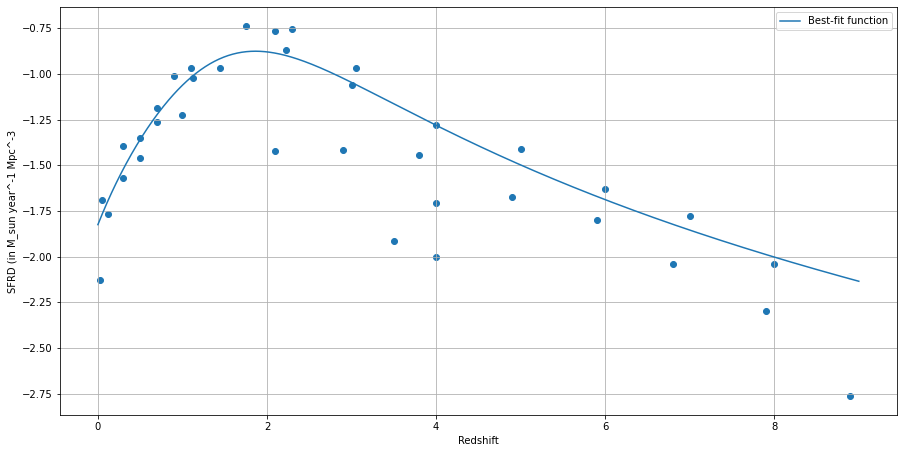

In [6]:
dust_cor_sfrd_uv = sfrd_all_uv + (A_fuv/2.5)

plt.figure(figsize=(15,7.5))
plt.scatter(z_all_uv, dust_cor_sfrd_uv)

def psi_md(z):
    ab = (1+z)**2.7
    cd = ((1+z)/2.9)**5.6
    ef = 0.015*ab/(1+cd)
    return ef

znew = np.linspace(0,9,1000)
psi1 = psi_md(znew)
psi2 = np.log10(psi1)

plt.plot(znew, psi2, label='Best-fit function')

plt.xlabel('Redshift')
plt.ylabel('SFRD (in M_sun year^-1 Mpc^-3')
plt.grid()
plt.legend(loc='best')

In [29]:
def sandage(lums9, alp9, phi9, sig9, lst9):
    ab = 1 + (lums9/lst9)
    bc = np.log10(ab)
    cd = bc**2
    ef = -cd/(2*sig9*sig9)
    gh = np.exp(ef)
    xy = (lums9/lst9)**(1-alp9)
    return xy*phi9*gh

ls2 = os.listdir(p1)
ls_ir = []

z_all_ir = np.array([])
sfrd_all_ir = np.array([])

for i in range(len(ls2)):
    if ls2[i][0:7] == 'data_IR':
        ls_ir.append(ls2[i])

import astropy.units as u
lmin_ir = (10**6)*(con.L_sun.to(u.erg/u.s).value)
lmax_ir = (10**15)*(con.L_sun.to(u.erg/u.s).value)
lums_ir1 = np.linspace(lmin_ir, lmax_ir, 10000)
print(lums_ir1)

[3.82800000e+39 3.82842111e+44 7.65680395e+44 ... 3.82723432e+48
 3.82761716e+48 3.82800000e+48]


41.34635297445064
-4.596123589296813e+41


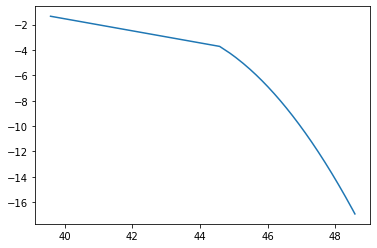

In [32]:
z1_ir, z2_ir, alp_ir, alperr_ir, lst_ir, lsterr_ir, sig_ir, sigerr_ir, phi_ir, phierr_ir = np.loadtxt(p1 + ls_ir[0], usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)
ppr_n1 = np.loadtxt(p1 + ls_ir[0], usecols=10, dtype=str, unpack=True)


san23 = sandage(lums9=lums_ir1, alp9=alp_ir, phi9=phi_ir, sig9=sig_ir, lst9=lst_ir)
plt.plot(np.log10(lums_ir1), np.log10(san23))
print(np.log10(0.03*lst_ir))

lums_inte = np.linspace(0.03*lst_ir, np.max(lums_ir1), 100000)
san34 = sandage(lums9=lums_inte, alp9=alp_ir, phi9=phi_ir, sig9=sig_ir, lst9=lst_ir)
sam_inte = lums_inte*san34
sam_inte1 = inte.simps(np.log10(lums_inte), sam_inte)
print(sam_inte1)

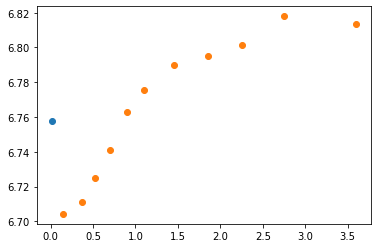

In [34]:
for i in range(len(ls_ir)):
    z1_ir, z2_ir, alp_ir, alperr_ir, lst_ir, lsterr_ir, sig_ir, sigerr_ir, phi_ir, phierr_ir = np.loadtxt(p1 + ls_ir[i], usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)
    ppr_n1 = np.loadtxt(p1 + ls_ir[i], usecols=10, dtype=str, unpack=True)
    if type(alp_ir) == np.float64:
        z1_ir, z2_ir, alp_ir, alperr_ir, lst_ir, lsterr_ir, sig_ir, sigerr_ir, phi_ir, phierr_ir, ppr_n1 = np.array([z1_ir]), np.array([z2_ir]), np.array([alp_ir]), np.array([alperr_ir]), np.array([lst_ir]), np.array([lsterr_ir]), np.array([sig_ir]), np.array([sigerr_ir]), np.array([phi_ir]), np.array([phierr_ir]), np.array([ppr_n1])
    sfrd_ir12 = np.array([])
    for j in range(len(z1_ir)):
        nor_lum = np.linspace(0.03*lst_ir[j], np.max(lums_ir1), 10000)
        nor_sc1 = sandage(nor_lum, alp9=alp_ir[j], phi9=phi_ir[j], sig9=sig_ir[j], lst9=lst_ir[j])
        nor_sc = nor_lum*nor_sc1#/phi1
        rho_nor = inte.simps(np.log10(nor_sc), nor_lum)
        sfrd_ir = rho_nor*kap_ir
        sfrd_ir12 = np.hstack((sfrd_ir12, sfrd_ir))
    zcen1 = (z1_ir + z2_ir)/2
    log_sfrd_ir12 = np.log10(sfrd_ir12)
    plt.scatter(zcen1, log_sfrd_ir12, label=ppr_n1[i])
    z_all_ir = np.hstack((z_all_ir, zcen1))
    sfrd_all_ir = np.hstack((sfrd_all_ir, sfrd_ir))